In [2]:
################################################################################
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import importlib
import warnings
from tracker import extractor, utils, metrics, visuals
from typing import List, Tuple, Callable, Generator
warnings.filterwarnings("ignore")

In [1]:
################################################################################
def toggle(matrix: np.ndarray, row: int, col: int) -> np.ndarray:
    """ Get a toggle matrix for a player's move at (row, col). """
    zeros  = np.zeros(matrix.shape)
    bounds = np.array(matrix.shape) - 1
    rows   = np.clip(np.arange((row - 1), (row + 2)), 0, bounds[0])
    cols   = np.clip(np.arange((col - 1), (col + 2)), 0, bounds[1])
    zeros[row, cols] = 1
    zeros[rows, col] = 1
    return zeros

def toggles(matrix: np.ndarray) -> Generator[np.ndarray, None, None]:
    """ Generate all possible toggle matrices for the matrix. """
    for row in range(matrix.shape[0]):
        for col in range(matrix.shape[1]):
            yield toggle(matrix, row, col)

def system(matrix: np.ndarray) -> np.ndarray:
    """ A matrix where each column is a flattened toggle matrix. """
    return np.dstack((m.flatten() for m in toggles(matrix)))[0]

def triangularize(matrix: np.ndarray) -> np.ndarray:
    """ Triangularize the matrix over the GF(2) field. """
    m = matrix.copy()
    length = np.min([m.shape[0], m.shape[1]])
    for col in range(length):
        for row in range(length - col):
            if not m[row, col]:
                continue
            # "below" is all the cells directly below the current cell.
            below = m[(row + 1):(length - col), col]
            if below.any(): # Zero the current cell using arithmetic.
                idx = below.argmax() + row + 1
                m[row, :] = (m[row, :] - m[idx, :]) % 2
            else: # Zero out the current cell using swaps.
                idx = length - col - 1
                m[row, :], m[idx, :] = m[idx, :], m[row, :]
    return m

def gauss(matrix: np.ndarray, vector: np.ndarray) -> np.ndarray:
    """ Solve Ax=b where A=matrix and b=vector over the GF(2) field. """
    augment = np.concatenate([matrix, np.expand_dims(vector, 1)], 1)
    augment = triangularize(augment)
    m = augment[:, :-1]
    v = augment[:, -1]
    terms = []
    for i in range(len(v)):
        

def solve(matrix: np.ndarray) -> np.ndarray:
    augment = gauss(system(matrix), matrix.flatten())
    return augment

puzzle = np.array(
    [[1, 1],
     [0, 1]]
)
solve(puzzle)

IndentationError: expected an indented block (<ipython-input-1-19ac04fde835>, line 50)

In [ ]:
################################################################################
def cartesian(phi: float, r: float) -> Tuple[float, float]:
    return (r * np.cos(phi), r * np.sin(phi))

def draw(graph) -> None:
    positions = [cartesian(n["phi"], n["r"]) for (_, n) in graph.nodes(True)]
    colors    = [color for (_, _, color) in graph.edges(data="track")]
    nx.draw_networkx(
        G=graph, pos=positions,
        node_size=200, node_color="black",
        font_size="8", font_color="yellow",
        edge_color=colors, style="solid",
        edge_cmap=plt.cm.prism)

    edge_labels = {}
    for (u, v, i) in graph.edges(data="track"):
        label = edge_labels.get((u, v))
        edge_labels[(u, v)] = "{0}, {1}".format(label, i) if label else str(i)
    nx.draw_networkx_edge_labels(graph, positions,
                                 edge_labels=edge_labels, font_size="8")

In [2]:
################################################################################
filename = "data/sets/NORM-10N-25T-25000E-235R.gz"
frame = pd.read_csv(filename)
frame = frame[(frame["noise"] == 0) & (frame["padding"] == 0)]

In [4]:
################################################################################
events = (event for (_, event) in frame.groupby("event_id", sort=False))
events = sorted(events, key=(lambda event: len(event["cluster_id"].unique())))

In [112]:
################################################################################
# 0, 43, 84, 165, 314, 570, 999, 1639, 2612, 3974, 5606, 7707, 10061, 12495,
# 14929, 17376, 19478, 21175, 22463, 23417, 24077, 24471, 24718, 24857, 24931
event  = events[84]
order  = ["phi", "r", "z"]
data   = extractor.extract_input(event, order)
matrix = extractor.extract_output(event, order)
print("Hits: {}".format(len(event)))
print("Tracks: {}".format(len(event["cluster_id"].unique())))

Hits: 27
Tracks: 3


In [113]:
################################################################################
for i in [0, 1]:
    matrix[6, i] = 1
    matrix[7, i] = 1
    matrix[8, i] = 1
print("All Done!")

All Done!


In [114]:
################################################################################
visuals.display_matrices(data, matrix, order=order, noise=False, padding=False)

,phi,r,z,A,B,C
0,-2.922578,39.0,4.004385,1,,
1,-2.912537,85.0,8.727505,1,,
2,-2.895213,155.0,15.914862,1,,
3,-2.881440,213.0,21.870101,1,,
4,-2.869043,271.0,27.825340,1,,
5,-2.838163,405.0,41.583995,1,,
6,-2.802079,562.0,57.704210,1,1,
7,-2.756821,762.0,78.239516,1,1,
8,-2.701992,1000.0,102.676530,1,1,
9,-1.954585,39.0,-3.572293,,1,


In [115]:
################################################################################
graph = nx.MultiDiGraph()

# Add the hits as nodes.
for n, hit in enumerate(data):
    phi, r, z = (hit[order.index(s)] for s in ("phi", "r", "z"))
    graph.add_node(n=n, phi=phi, r=r, z=z)

# Place sink origin node.    
graph.add_node(n=len(data), phi=0, r=0, z=0)
    
# Assign hits to radiuses.
r_order = order.index("r")
radius_values = np.unique(data[:, r_order])
radiuses = [[] for _ in radius_values]
for row, hit in enumerate(data):
    radius = hit[r_order]
    index = np.where(radius == radius_values)[0][0]
    radiuses[index].append(row)

print("-- Radiuses --")
for radius in radiuses:
    print(radius)

# Assign hits to tracks.
tracks = [[[] for _ in radiuses] for _ in matrix.T]
for (row, track_id) in np.stack(matrix.nonzero(), axis=-1):
    index = np.where(radius_values == data[row, r_order])[0][0]
    tracks[track_id][index].append(row)
tracks = [[layer for layer in track if layer] for track in tracks]

print("-- Tracks --")
for track in tracks:
    print(track)

# Assign the tracks as edges.
for track_id, track in enumerate(tracks):
    for hit in track[0]:
        graph.add_edge(hit, len(data), track=track_id)
    for i in range(len(track) - 1):
        for sink_index in track[i]:
            for source_index in track[(i + 1)]:
                graph.add_edge(source_index, sink_index, track=track_id)

# for radius in radiuses:
#     for hit_index in radius:
#         for edge in graph.edges([hit_index], data=True):
#             track_id = edge[2]["track"]
#             if edge[1] == len(data):  # If connected to origin...
#                 continue  # Do not remove any edges.
#             ids = [e[2]["track"] for e in graph.edges([edge[1]], data=True)]
#             if track_id not in ids:
#                 graph.remove_edge(edge[0], edge[1], key=("track", track_id))

-- Radiuses --
[0, 9, 26]
[1, 10, 25]
[2, 11, 24]
[3, 12, 23]
[4, 13, 22]
[5, 14, 21]
[6, 15, 20]
[7, 16, 19]
[8, 17, 18]
-- Tracks --
[[0], [1], [2], [3], [4], [5], [6], [7], [8]]
[[9], [10], [11], [12], [13], [14], [6, 15], [7, 16], [8, 17]]
[[26], [25], [24], [23], [22], [21], [20], [19], [18]]


<IPython.core.display.Javascript object>


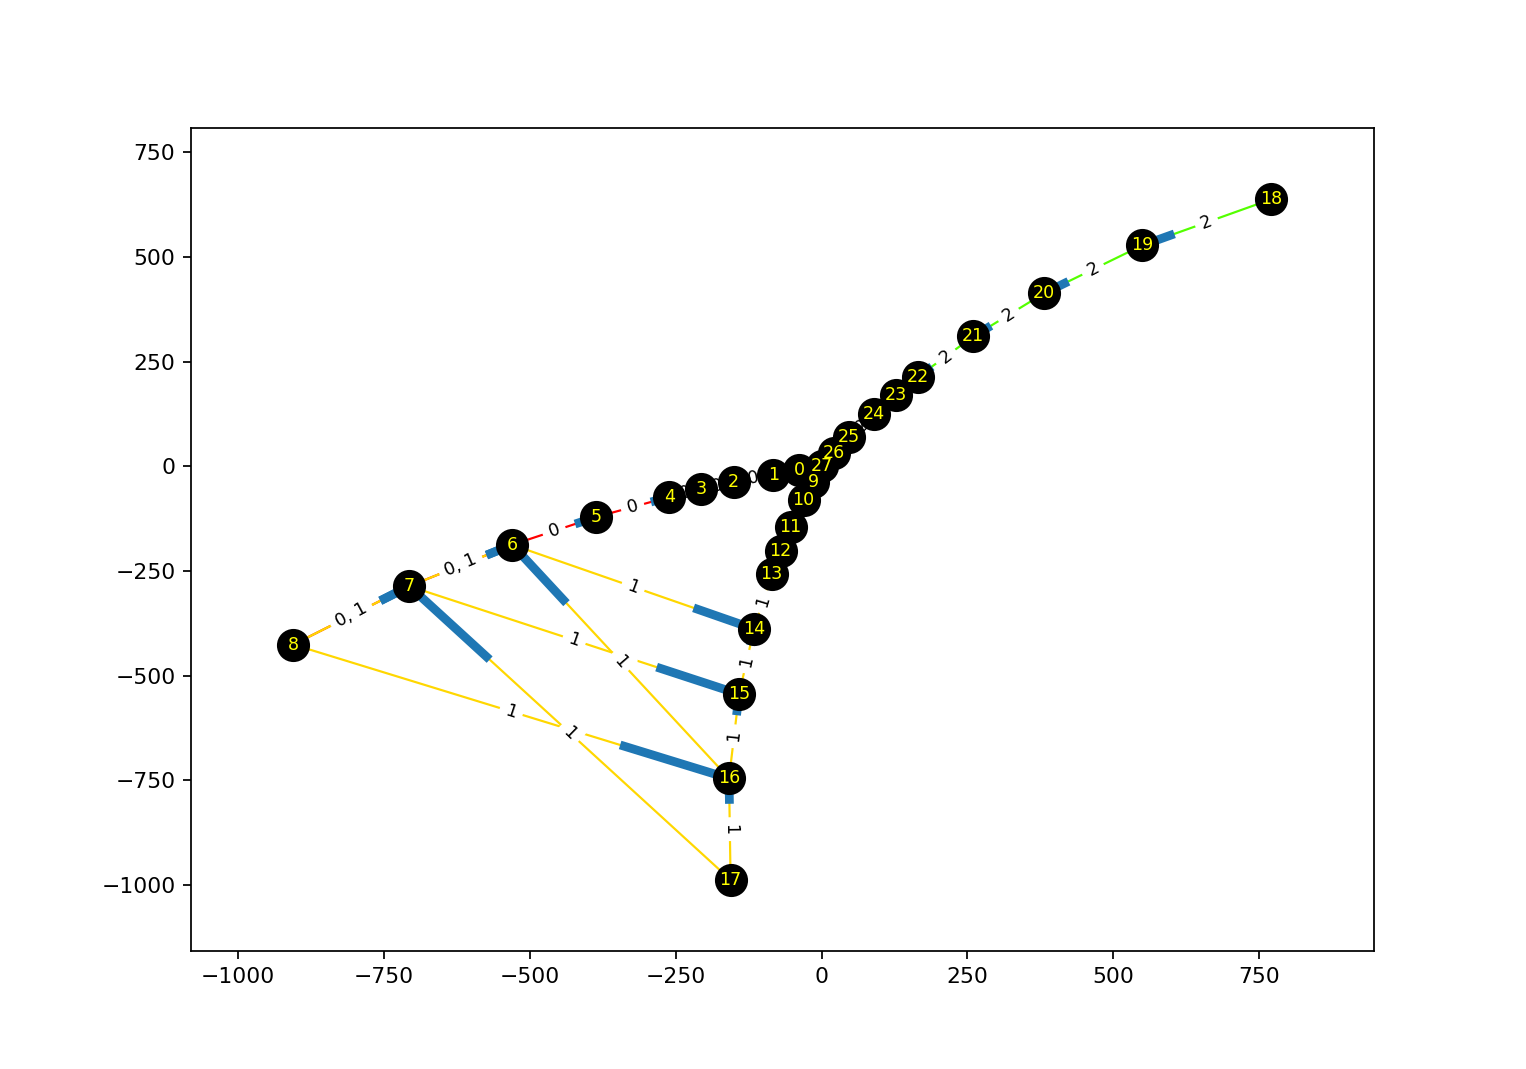

In [119]:
################################################################################
draw(graph)

## Problem:
#### Let G be a directed, acyclic, weakly-connected multigraph.
#### G has n source vertices and 1 sink vertex.
#### Every edge in G has an integer label within [0, 1, ..., (n - 1)].
#### Determine whether there exist n vertex-disjoint paths from each source vertex to the sink vertex, such that each path contains only edges with the same label and each path contains a unique label. If these paths exist, return them. If there is more than 1 unique set of paths, just return 1 of the sets.

In [3]:
import pandas as pd
frame = pd.read_csv("data/sets/ACTS-MU10-PT1000-COMPLETE.gz")

In [9]:
cols  = ["event_id", "cluster_id", "r", "phi", "z"]
small = frame[frame["event_id"] < 20]
small = small.assign(phi=np.arctan2(small["y"], small["x"]) % (2 * np.pi))
small = small[cols]
small = small.sort_values(cols)
small.to_csv("data/sets/ACTS-SMALL-NOT-PREPARED.gz", compression="gzip")